In [1]:
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13396\2512111509.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  ax.plot(3.5,1.8,'or',


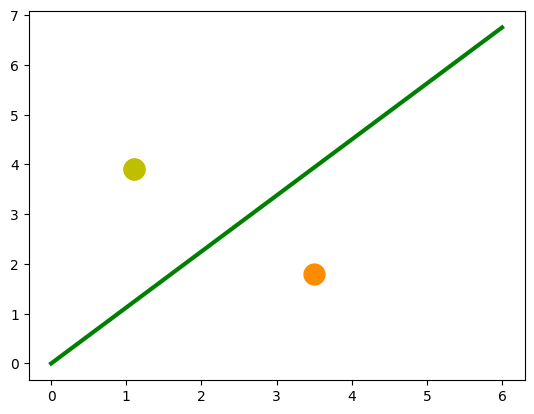

In [2]:
x = np.arange(0,7)
fig, ax = plt.subplots()

ax.plot(3.5,1.8,'or',
       color='darkorange',
       markersize = 15)
ax.plot(1.1,3.9,'oy',
       markersize=15)
point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, 'oy', markersize=15)
#calculate gradient:
m = point_on_line[1] / point_on_line[0]
ax.plot(x, m*x, 'g-', linewidth=3)
plt.show()

In [3]:
lemon = (1.1 , 3.9)
orange = (3.5, 1.8)
m = 4.5 /4

print(orange[0] * m - orange[1])

print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


### Page100

In [4]:
import numpy as np
import matplotlib.pyplot as plt

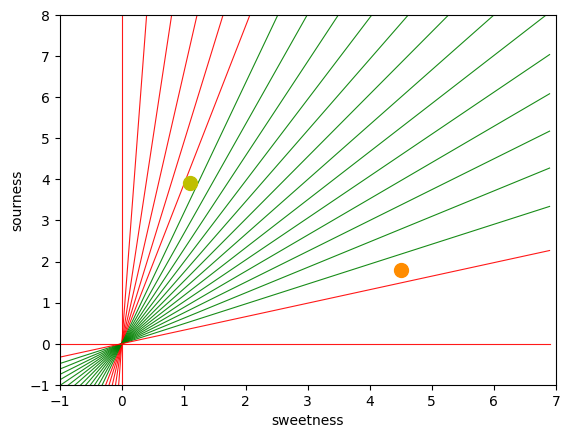

In [5]:
def create_distance_function(a,b,c):
    # 0 = ax +by + c
    def distance(x,y):
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom >0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt(a**2 + b**2), pos)
    return distance

orange = (4.5, 1.8)
lemon = (1.1 , 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4linel = create_distance_function(slope, -1, 0)
    Y = slope * X
    result = []
    for point in fruits_coords:
        result.append(dist4linel(*point))
    if (result[0][1] != result[1][1]):
        ax.plot(X, Y,"g-", linewidth=0.8, alpha = 0.9)
    else:
        ax.plot(X, Y,"r-", linewidth=0.8, alpha = 0.9)
        
size = 10
for (index, (x,y)) in enumerate(fruits_coords):
    if index ==0:
        ax.plot(x,y,'o',
               color = "darkorange",
               markersize= size)
    else:
        ax.plot(x,y,'oy',
               markersize=size)
        
plt.show()

### Page 102

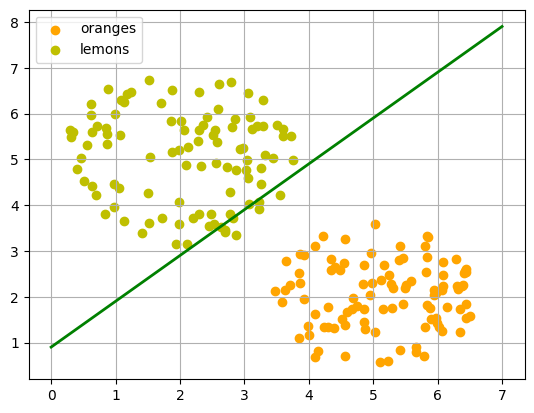

In [6]:
def points_within_circle(radius,
                        center = (0,0),
                        number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r* np.cos(theta)
    y = center_y + r* np.sin(theta)
    return x, y

X = np.arange(0,8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6,(5,2),100)
lemons_x, lemons_y = points_within_circle(1.9, (2,5),100)

ax.scatter(oranges_x,
          oranges_y,
          c='orange',
          label='oranges')
ax.scatter(lemons_x,
          lemons_y,
          c='y',
          label='lemons')

ax.plot(X, 0.9 + X, "g-", linewidth=2)
ax.legend()
ax.grid()
plt.show()

In [7]:
from itertools import repeat
from random import shuffle

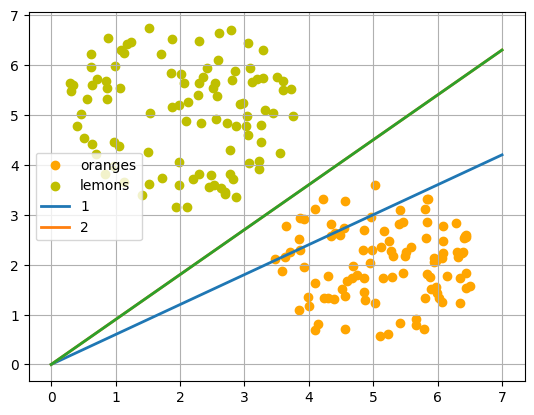

In [8]:
X = np.arange(0,8)
fig ,ax = plt.subplots()
ax.scatter(oranges_x,
          oranges_y,
          c='orange',
          label='oranges')

ax.scatter(lemons_x,
          lemons_y,
          c='y',
          label='lemons')

fruits = list(zip(oranges_x,
                 oranges_y,
                 repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x,
                  lemons_y,
                  repeat(1,len(oranges_x))))
shuffle(fruits)

def adjust(learning_rate=0.3, slope=0.3):
    line = None
    counter = 0
    for x, y, label in fruits:
        res = slope * x -y
        if label == 0 and res < 0:
            slope += learning_rate
            counter +=1
            ax.plot(X, slope * X,
                   linewidth= 2, label=str(counter))
            
        
        elif label == 1 and res > 0:
            slope -= learning_rate
            counter +=1
            ax.plot(X, slope * X,
                   linewidth=2, label = str(counter))
    return slope

slope = adjust()
ax.plot(X, slope * X,
       linewidth=2)

ax.legend()
ax.grid()
plt.show()

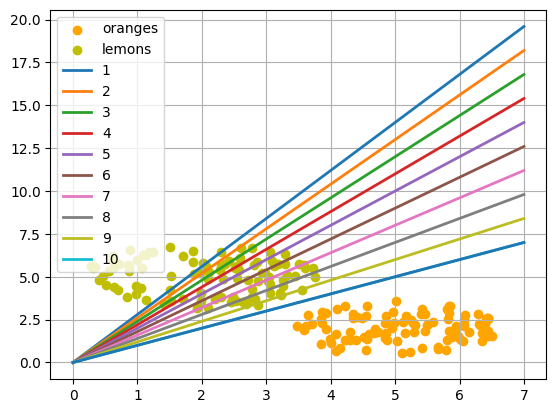

0.9999999999999996


In [9]:
X = np.arange(0,8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
          oranges_y,
          c='orange',
          label = 'oranges')
ax.scatter(lemons_x,
          lemons_y,
          c='y',
          label='lemons')

slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X, slope * X,
       linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)

### A Simple Neural Network

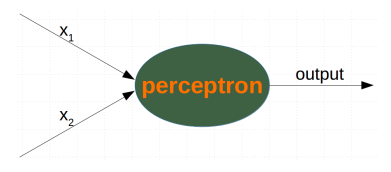

In [10]:
class Perceptron:
    
    def __init__(self,weights):
        #Weights can be a numpy array, list or a tuple
        #with the actual values of the weights. The
        #Number of input values is indirectly defined by
        # the length of "weights"
        self.weights = np.array(weights)
        
    def __call__(self ,in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum
    
p = Perceptron(weights=[-0.45,0.5])

for point in zip(oranges_x[:10],oranges_y[:10]):
    res = p(point)
    print(res, end=", ")
    
for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=",")

-0.4753143815316614, -1.1955474566808586, -0.8842955339298131, -1.604797987418968, -1.4967471437241093, -0.28567240260960935, -1.41637786480971, -0.2695153615567949, -1.609792504969154, -0.7910091583681201, 0.5146722927956238,2.4061202062452365,2.0065953968530055,1.5450016930666073,1.0250028060824468,1.1294341106606471,1.7093829211329155,1.3158009102438868,2.2747822205244455,2.3491328532184133,

### Page 111

In [11]:
from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
        
for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] +=1
    else:
        evaluation['wrongs'] +=1
print(evaluation)

Counter({'corrects': 200})


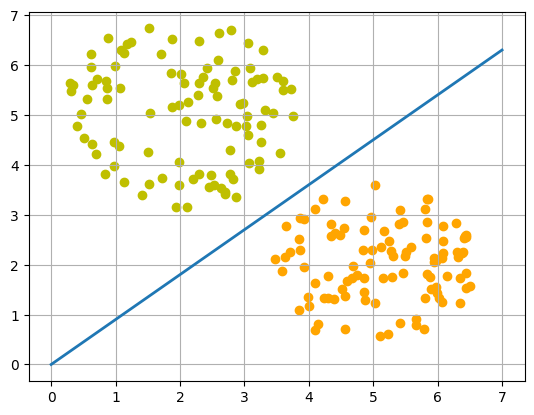

0.9


In [12]:
import time
import matplotlib.pyplot as plt
slope = 0.1

X = np.arange(0,8)

fig, ax = plt.subplots()
ax.scatter(oranges_x,
          oranges_y,
          c='orange',
          label='oranges')
ax.scatter(lemons_x,
          lemons_y,
          c='y',
          label="lemons")

slope = 0.45 / 0.5
ax.plot(X, slope * X, linewidth=2)

ax.grid()
plt.show()
print(slope)

### Training A Neural Network

In [14]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons,
                        [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels,
                      train_size=0.8,
                      test_size=0.2,
                      random_state=42)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], train_labels[:10])

[(2.9742556143539653, 5.241021617049115), (4.7404283041771595, 1.8024058904383764), (2.5528783419729364, 4.91820453780606), (3.2946692289065966, 6.303298139863298), (3.647692791379421, 2.777651502594105), (1.528644899803682, 5.04606254646524), (5.784700922479762, 0.7063789483255236), (3.1178439627653036, 5.6563572714275905), (4.341420124391568, 2.8174062657633634), (2.777114969094421, 3.8141452875537203)] [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]


In [15]:
labelled_data

[((2.102750719989706, 3.159535338156978), 1),
 ((4.670607505088941, 1.7411079225010824), 0),
 ((2.776160705120324, 4.294391597887376), 1),
 ((2.4454559718002686, 3.550439672441069), 1),
 ((5.410833954782377, 3.1011594914445135), 0),
 ((4.305530171520171, 1.7687714847864717), 0),
 ((3.7257507524119564, 5.510350910252462), 1),
 ((0.9757963965523389, 3.9682201430303197), 1),
 ((2.3278061332850886, 4.846868165089955), 1),
 ((2.096752398617391, 4.875169367885461), 1),
 ((0.7185907409448515, 5.726280535058704), 1),
 ((3.0566643547849015, 4.5951522552744635), 1),
 ((5.415381025356249, 0.8288323743996315), 0),
 ((2.1178284937992786, 5.261211482896088), 1),
 ((2.926491988591363, 5.225429050361569), 1),
 ((5.992093865544691, 1.425486876987064), 0),
 ((1.5123902793292268, 6.731177924569566), 1),
 ((2.2969235715880867, 5.6460092176954015), 1),
 ((4.96339203217847, 2.94835565673659), 0),
 ((3.1178439627653036, 5.6563572714275905), 1),
 ((3.847762368461229, 1.0909914979518915), 0),
 ((3.443077394616

In [17]:
import numpy as np
from collections import Counter

class Perceptron:
    def __init__(self,
                weights,
                learning_rate=0.1):
        #'weights' can be a numpy array, list or a tuple with
        # the actual values of the weights. The number of input
        # values is indirectly defined by the length of 'weights'
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if x < 0 :
            return 0
        else:
            return 1
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self,
              target_result,
              calculated_result,
              in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)
        error = target_result - calculated_result
        if error != 0:
            correction = error + in_data * self.learning_rate
            self.weights += correction
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] +=1
            else:
                evaluation["wrong"] +=1
        return evaluation
    
p = Perceptron(weights=[0.1,0.1], learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index],
            p(train_data[index]),
            train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('wrong', 95), ('correct', 65)]
[('wrong', 23), ('correct', 17)]
[54.72353486 -9.20523504]


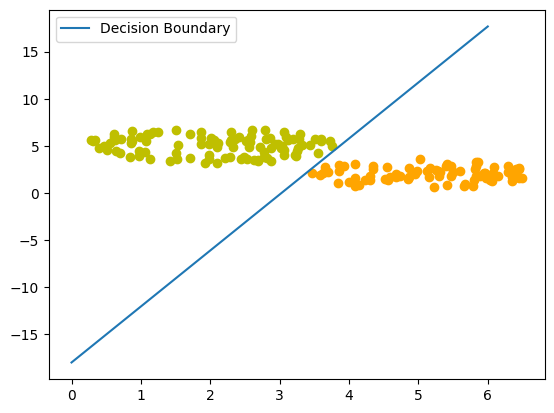

[54.72353486 -9.20523504]


In [28]:
X = np.arange(0,7)
fig, ax = plt.subplots()

lemon = [train_data[i] for i in range(len(train_data)) if train_labels[i]==1]

lemons_x, lemon_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i]==0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X - 18, label="Decision Boundary")
ax.legend()
plt.show()
print(p.weights)

1 1.453270595005046 [ 0.52212849 -0.35927823] (4.7404283041771595, 1.8024058904383764)
2 -1.081188089565597 [2.28799199 2.11618313] (2.5528783419729364, 4.91820453780606)
4 -1.222018983236769 [2.38229983 1.94947858] (3.647692791379421, 2.777651502594105)
6 -2.6844591662236126 [3.11771011 1.16139226] (5.784700922479762, 0.7063789483255236)
8 -3.397663511365342 [3.42013615 1.00661414] (4.341420124391568, 2.8174062657633634)
11 -5.770655885635904 [4.09827561 0.71019234] (5.593798227145975, 2.345260658948221)
12 -18.228825013188942 [4.38993466 0.24082379] (4.305530171520171, 1.7687714847864717)
13 -59.26752636471172 [5.27663888 0.08903086] (6.289014047816671, 2.8273569134155845)


IndexError: index 7 is out of bounds for axis 0 with size 7

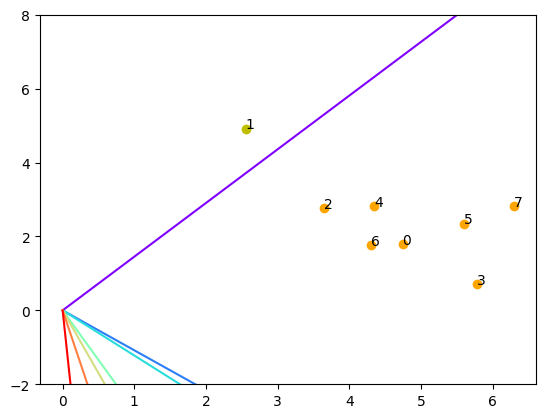

In [43]:
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],
              learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0,1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2,8])

counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],
            p(train_data[index]),
            train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] ==0 else "y"
        ax.scatter(train_data[index][0],
                  train_data[index][1],
                   color=color)
        ax.annotate(str(counter),
                   (train_data[index][0],train_data[index][1]))
        
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        #ax.plot(X, m * X +18 , label=str(counter),color = colors[counter])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])

        counter +=1
        
ax.legend()
plt.show()

### Linearly Separable Data Sets Page117

#### Perceptron for the AND function

[]

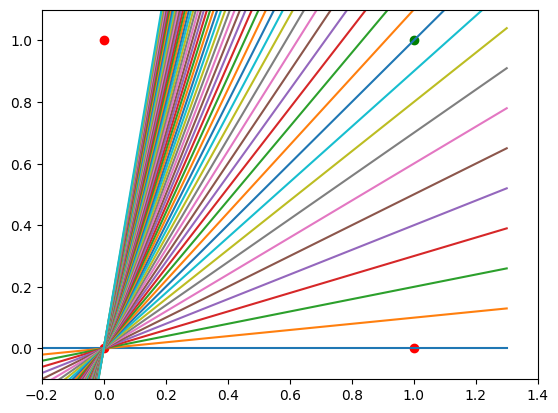

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0,6, 0.1):
    ax.plot(X, m*X)

plt.plot()

[]

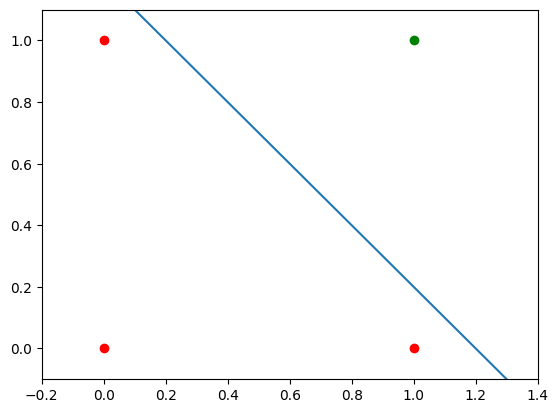

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
c= 1.2

ax.plot(X, m*X +c)

plt.plot()

### Single Perceptron With BIAS page120

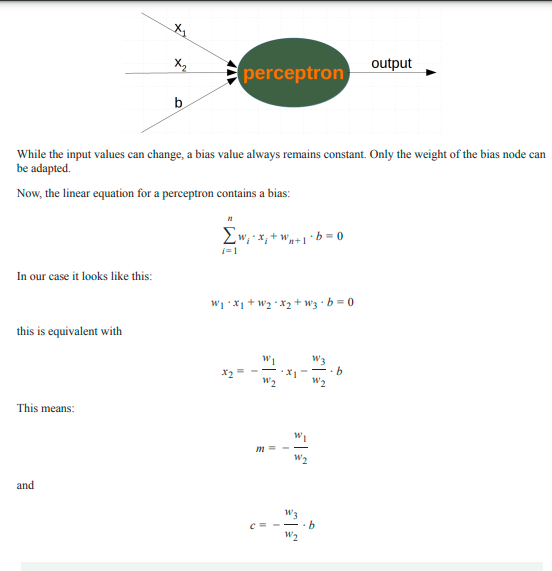

In [6]:
import numpy as np
from collections import Counter

class Perceptron:
    def __init__(self,weights,bias=1,learning_rate=0.3):
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if x<=0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        in_data = np.concatenate((in_data, [self.bias]))
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)
    
    def adjust(self, target_result, in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate((in_data, [self.bias]))
            correction = error * in_data *self.learning_rate
            self.weights += correction
            
    def evaluate(self,data,labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) #predict
            if result ==label:
                evaluation["correct"] +=1
            else:
                evaluation["wrong"] +=1
        return evaluation

In [7]:
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0,2, (2,))
        yield (s, 1) if s[0] == 1 and s[1]==1 else (s, 0)

p = Perceptron(weights=[0.3, 0.3 ,0.3], learning_rate=0.2)

for in_data, label in labelled_samples(30):
    p.adjust(label, in_data)
    
test_data, test_labels = list(zip(*labelled_samples(30)))

evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 30})


-1.0 1.0000000000000007


[]

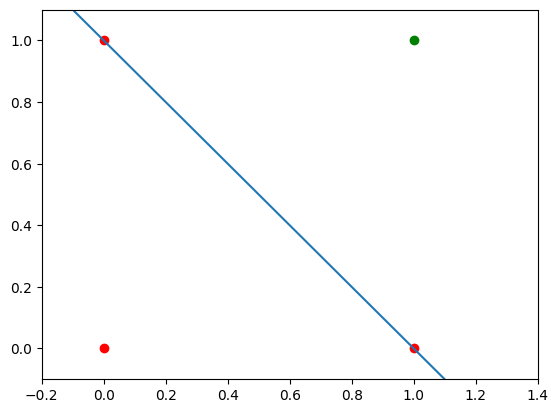

In [8]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()


In [9]:
from sklearn.datasets import make_blobs

n_samples = 250
samples, labels = make_blobs(n_samples= n_samples,
                            centers=([2.5,3], [6.7, 7.9]),
                            random_state=0)

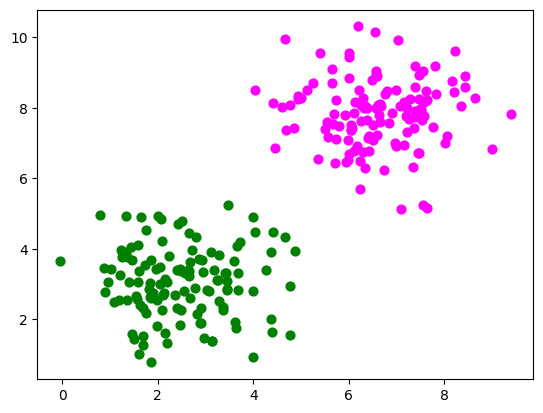

In [11]:
colours = ('green','magenta','blue','cyan','yellow','red')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:,0], samples[labels==n_class][:,1],
              c=colours[n_class], s=40, label=str(n_class))

In [12]:
n_learn_data = int(n_samples * 0.8) # 80% of available data point
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]

p = Perceptron(weights=[0.3, 0.3, 0.3],learning_rate=0.8)
for sample, label in zip(learn_data, learn_labels):
    p.adjust(label, sample)
    
evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

Counter({'correct': 200})


-1.5513529034664024 11.736643489707035


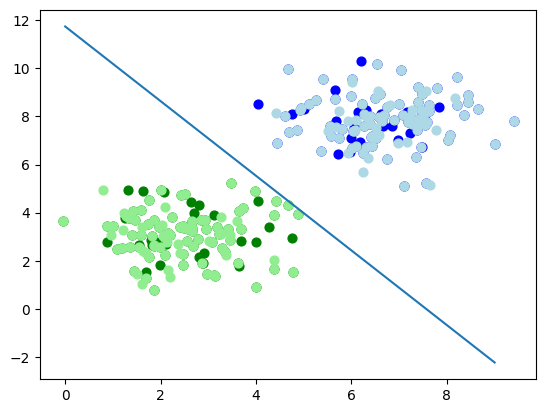

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(learn_data[learn_labels==n_class][:, 0],
                learn_data[learn_labels==n_class][:, 1],
                c=colours[n_class], s=40, label=str(n_class))
# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0],
                test_data[test_labels==n_class][:, 1],
                c=colours[n_class], s=40, label=str(n_class))

X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()


### The XOR problem for neural networks page 127